<a href="https://colab.research.google.com/github/jvieirax/producao_vinho/blob/main/Produ%C3%A7%C3%A3o_de__Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns


# Carregando base de Dados em CSV de Produção de Vinho


In [104]:
df_expvinho = pd.read_csv("https://raw.githubusercontent.com/jvieirax/producao_vinho/main/dados/ExpVinho_ISO.csv", encoding='utf-8', sep=';', na_values="-",engine='python')

In [105]:
df_expvinho.head()

,Id,País,ISO,1970,1970.1,1971,1971.1,1972,1972.1,1973,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,AFG,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,ZAF,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",DDR,0,0,0,0,4168,2630,12000,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,AGO,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,AIA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df_expvinho.columns.get_loc('2021') #get da posição da coluna dentro do df

105

# Separando e Renomeando a Produção em KG do Valor Exportado em USD

In [107]:
df_vinho_kg = df_expvinho.iloc[:, [0,1,2,75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105]] #Filtrando somente as colunas com dados de quantidade


In [108]:
df_vinho_kg

,Id,País,ISO,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,Afeganistão,AFG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
1,2,África do Sul,ZAF,0,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0
2,3,"Alemanha, República Democrática",DDR,38302,119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698
3,4,Angola,AGO,3766,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0
4,5,Anguilla,AIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,Tuvalu,TUV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
124,125,Uruguai,URY,1008,0,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774
125,126,Vanuatu,VAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0
126,127,Venezuela,VEN,0,20700,0,0,0,0,1029,0,14,0,0,680,71,0,4086,26415


In [109]:
df_vinho_usd = df_expvinho.iloc[:, [0,1,2,76,78,80,82,84,86,88,90,92,94,96,98,100,102,104,106]] #Filtrando somente as colunas com dados de valor em USD

In [110]:
df_vinho_usd


,Id,País,ISO,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1
0,1,Afeganistão,AFG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
1,2,África do Sul,ZAF,0,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0
2,3,"Alemanha, República Democrática",DDR,89231,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741
3,4,Angola,AGO,18293,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0
4,5,Anguilla,AIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,Tuvalu,TUV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
124,125,Uruguai,URY,1685,0,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842
125,126,Vanuatu,VAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0
126,127,Venezuela,VEN,0,27370,0,0,0,0,7492,0,232,0,0,2646,355,0,9808,35944


In [111]:
df_vinho_usd.columns

Index(['Id', 'País', 'ISO', '2006.1', '2007.1', '2008.1', '2009.1', '2010.1',
       '2011.1', '2012.1', '2013.1', '2014.1', '2015.1', '2016.1', '2017.1',
       '2018.1', '2019.1', '2020.1', '2021.1'],
      dtype='object')

In [112]:
df_vinho_usd.rename(columns={"Id":"Id","País":"País","ISO":"ISO","2006.1":"2006","2007.1":"2007", "2008.1":"2008","2009.1":"2009","2010.1":"2010","2011.1":"2011","2012.1":"2012","2013.1":"2013","2014.1":"2014","2015.1":"2015","2016.1":"2016","2017.1":"2017","2018.1":"2018","2019.1":"2019","2020.1":"2020","2021.1":"2021"}, inplace=True) #Renomeando as colunas para tirar o .1

<ipython-input-112-848715fda34b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vinho_usd.rename(columns={"Id":"Id","País":"País","ISO":"ISO","2006.1":"2006","2007.1":"2007", "2008.1":"2008","2009.1":"2009","2010.1":"2010","2011.1":"2011","2012.1":"2012","2013.1":"2013","2014.1":"2014","2015.1":"2015","2016.1":"2016","2017.1":"2017","2018.1":"2018","2019.1":"2019","2020.1":"2020","2021.1":"2021"}, inplace=True) #Renomeando as colunas para tirar o .1


In [113]:
df_vinho_usd

,Id,País,ISO,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,Afeganistão,AFG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
1,2,África do Sul,ZAF,0,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0
2,3,"Alemanha, República Democrática",DDR,89231,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741
3,4,Angola,AGO,18293,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0
4,5,Anguilla,AIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,124,Tuvalu,TUV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
124,125,Uruguai,URY,1685,0,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842
125,126,Vanuatu,VAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0
126,127,Venezuela,VEN,0,27370,0,0,0,0,7492,0,232,0,0,2646,355,0,9808,35944


In [114]:
df_vinho_usd.columns.get_loc("2006")

3

In [115]:
df_vinho_usd.columns.get_loc("2021")

18

In [116]:
df_vinho_usd.iloc[:,3:19]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,46
1,0,0,0,0,0,0,0,0,0,0,0,0,0,95,21,0
2,89231,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467,32605,6741
3,18293,49753,71083,84235,189891,69001,8861,9300,23124,17089,35390,61680,709,1065,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
124,1685,0,0,0,2929,4404,3879,13343,0,0,0,0,29617,18497,0,149842
125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0
126,0,27370,0,0,0,0,7492,0,232,0,0,2646,355,0,9808,35944


In [117]:
df_vinho_kg.iloc[:,3:19]

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
1,0,0,0,0,0,0,0,0,0,0,0,0,0,26,4,0
2,38302,119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660,6261,2698
3,3766,25931,25721,54786,33557,13889,2833,1573,12182,1908,7359,10170,477,345,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
124,1008,0,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774
125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0
126,0,20700,0,0,0,0,1029,0,14,0,0,680,71,0,4086,26415


# Dividindo o valor exportado em USD pela produção em Kg

In [118]:
df_usd_div_kg = df_vinho_usd.iloc[:,3:19] / df_vinho_kg.iloc[:,3:19]   # divisão para saber o ratio usd/kg

In [119]:
df_usd_div_kg = df_usd_div_kg.fillna(0)

In [120]:
     #df_new = df1.join(df2['column_name'])
df_usd_div_kg = df_usd_div_kg.join(df_vinho_usd.iloc[:,0:3])

In [121]:
df_usd_div_kg

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Id,País,ISO
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.181818,1,Afeganistão,AFG
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.653846,5.250000,0.000000,2,África do Sul,ZAF
2,2.329669,1.991867,1.617998,1.748141,5.003283,3.996396,6.880205,4.310896,3.570003,4.192884,4.860762,5.670266,4.204373,6.958197,5.207635,2.498517,3,"Alemanha, República Democrática",DDR
3,4.857408,1.918669,2.763617,1.537528,5.658760,4.968032,3.127780,5.912270,1.898210,8.956499,4.809077,6.064897,1.486373,3.086957,0.000000,0.000000,4,Angola,AGO
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,Anguilla,AIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,124,Tuvalu,TUV
124,1.671627,0.000000,0.000000,0.000000,3.204595,3.557351,3.417621,8.743775,0.000000,0.000000,0.000000,0.000000,3.840877,2.993042,0.000000,1.095544,125,Uruguai,URY
125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.722222,0.000000,126,Vanuatu,VAN
126,0.000000,1.322222,0.000000,0.000000,0.000000,0.000000,7.280855,0.000000,16.571429,0.000000,0.000000,3.891176,5.000000,0.000000,2.400392,1.360742,127,Venezuela,VEN


# Mudando o Index para a Coluna País

In [122]:
df_usd_div_kg = df_usd_div_kg.set_index("País")

# Ordenando pelos maiores valores de 2021

In [123]:
df_usd_div_kg_ordenado = df_usd_div_kg.sort_values(by="2021", ascending=False)    #dados ordenados pelo maiores valores de 2021

In [124]:
df_usd_div_kg_ordenado.iloc[:,0:16] #removi o ID e o ISO por hora

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País,,,,,,,,,,,,,,,,
Nova Zelândia,0.000000,0.000000,0.000000,0.000000,0.000000,3.089293,3.729695,4.075697,4.883929,4.296663,18.793651,4.851013,5.743034,5.664000,5.421053,15.946728
"Tcheca, República",4.353649,2.222900,3.776423,4.736433,4.844180,5.444201,3.491080,6.369759,7.778889,6.662603,7.420641,6.171522,7.735988,7.749882,8.534636,13.131579
Emirados Arabes Unidos,3.983471,0.000000,5.046368,2.884120,3.097585,3.110377,4.888889,0.000000,5.282813,4.888889,4.717949,4.891852,4.894444,4.893333,3.922547,12.990123
Suíça,2.327947,2.710464,3.977585,2.940694,10.666667,0.000000,11.768809,9.938272,8.297068,5.405116,7.881797,11.466054,0.000000,12.821862,9.879731,11.162679
Bangladesh,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.666667,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Camarões,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.274443,0.000000,0.000000,inf,0.000000
Iraque,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Indonésia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000


In [125]:
df_vinho_kg_ordenado = df_vinho_kg.sort_values(by="2021", ascending=False)

In [126]:
df_vinho_kg_ordenado = df_vinho_kg_ordenado.set_index("País")


In [127]:
df_vinho_kg_ordenado.T.head()

País,Paraguai,Haiti,Rússia,Uruguai,Estados Unidos,Nigéria,China,Japão,Curaçao,Panamá,...,"Eslovaca, Republica",Namibia,Nicaragua,Equador,El Salvador,Cuba,Croácia,Omã,Costa Rica,Vietnã
Id,98,63,106,125,49,91,29,76,41,97,...,47,89,90,46,44,40,39,95,38,128
ISO,PRY,HTI,RUS,URY,USA,NGA,CHN,JPN,CUW,PAN,...,SVK,NAM,NIC,ECU,SLV,CUB,HRK,OMN,CRI,VAN
2006,1947106,0,334200,1008,392590,0,0,325031,0,13,...,0,0,0,0,0,0,0,0,0,2013
2007,1285459,0,266400,0,479269,0,7638,357943,0,810,...,0,0,0,2700,0,2669,0,0,0,0
2008,2191901,20,6207658,0,443895,7560,8689,232293,0,1161,...,585,340,0,0,0,0,0,0,55,0


# Carregando base de dados de renda per capita por Pais

In [128]:
df_gni = pd.read_csv("https://raw.githubusercontent.com/jvieirax/producao_vinho/main/dados/GNP.csv", encoding='utf-8', sep=',',skiprows=4,na_values="-",engine='python')

In [129]:
df_gni = df_gni.fillna(0)

In [130]:
df_gni = df_gni.set_index("Country Name")

In [131]:
df_gni.columns

Index(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Unnamed: 67'],
      dtype='object')

In [132]:
columns_to_drop = ['1960', '1961','1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970','1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979','1980','1981','1982', '1983', '1984', '1985', '1986', '1987', '1988','1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997','1998', '1999', '2000','2001', '2002', '2003', '2004', '2005']

In [133]:
df_gni_dropado = df_gni.drop(columns_to_drop, axis=1)

In [134]:
df_gni_dropado.T

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Code,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Indicator Name,"GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)",...,"GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)","GNI per capita, Atlas method (current US$)"
Indicator Code,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,...,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD,NY.GNP.PCAP.CD
2006,24870.0,1146.630518,0.0,1018.761712,1810.0,3050.0,0.0,4315.287601,42600.0,5460.0,...,0.0,730.0,1920.0,7831.063825,2450.0,0.0,760.0,6180.0,730.0,290.0
2007,23390.0,1256.100531,0.0,1188.39837,2460.0,3460.0,0.0,4943.137091,41580.0,6480.0,...,0.0,840.0,2020.0,8344.538395,2640.0,0.0,840.0,6510.0,910.0,250.0
2008,27580.0,1339.576067,0.0,1434.616744,3030.0,4040.0,0.0,5769.989309,40490.0,7630.0,...,0.0,990.0,2360.0,8942.849712,2950.0,0.0,950.0,6560.0,1180.0,130.0
2009,24930.0,1363.038433,460.0,1501.523375,3170.0,4280.0,0.0,5868.015908,34670.0,7760.0,...,0.0,1120.0,2430.0,8978.427929,3140.0,0.0,1030.0,6420.0,1270.0,440.0
2010,23390.0,1438.818933,520.0,1559.231753,3210.0,4360.0,0.0,6168.562166,33670.0,9270.0,...,0.0,1370.0,2510.0,9413.579635,3400.0,3150.0,1130.0,6810.0,1330.0,650.0
2011,23400.0,1575.319715,550.0,1594.906617,3360.0,4410.0,0.0,6183.458073,36540.0,10710.0,...,0.0,1630.0,2710.0,9882.175165,3540.0,3390.0,1010.0,7700.0,1390.0,950.0
2012,24440.0,1684.37762,650.0,1766.961435,4060.0,4360.0,0.0,6917.575985,41810.0,11890.0,...,0.0,1980.0,2750.0,10463.501312,3560.0,3540.0,1180.0,8320.0,1660.0,1120.0


# Analise da Produção de Vinhos em Litros

In [135]:
df_vinho_kg_ordenado[df_vinho_kg_ordenado.columns[1:-1]].head(30)

,ISO,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
País,,,,,,,,,,,,,,,,
Paraguai,PRY,1947106,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013
Haiti,HTI,0,0,20,4500,2700,0,0,0,0,0,0,0,79500,81873,399128
Rússia,RUS,334200,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463
Uruguai,URY,1008,0,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0
Estados Unidos,USA,392590,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178
Nigéria,NGA,0,0,7560,41,0,54,6449,1350,0,0,0,0,5175,28437,12094
China,CHN,0,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253
Japão,JPN,325031,357943,232293,217974,112178,100835,29281,91988,106426,31597,34341,33909,36992,40621,36442
Curaçao,CUW,0,0,0,0,0,0,0,0,0,0,0,12340,23930,33951,47962


In [136]:
df_vinho_kg_ordenado.columns[0:8]

Index(['Id', 'ISO', '2006', '2007', '2008', '2009', '2010', '2011'], dtype='object')

In [137]:
df_vinho_kg_ordenado_drop = df_vinho_kg_ordenado.drop(['Id', 'ISO'], axis=1)

In [138]:
df_vinho_kg_ordenado_drop.head(30)

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País,,,,,,,,,,,,,,,,
Paraguai,1947106,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527
Haiti,0,0,20,4500,2700,0,0,0,0,0,0,0,79500,81873,399128,670379
Rússia,334200,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931
Uruguai,1008,0,0,0,914,1238,1135,1526,0,0,0,0,7711,6180,0,136774
Estados Unidos,392590,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765,300178,111085
Nigéria,0,0,7560,41,0,54,6449,1350,0,0,0,0,5175,28437,12094,68247
China,0,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852,122253,61884
Japão,325031,357943,232293,217974,112178,100835,29281,91988,106426,31597,34341,33909,36992,40621,36442,39491
Curaçao,0,0,0,0,0,0,0,0,0,0,0,12340,23930,33951,47962,32263


In [139]:
df_vinho_kg_ordenado_drop[:'Rússia'].head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
País,,,,,,,,,,,,,,,,
Paraguai,1947106,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537,3299013,6522527
Haiti,0,0,20,4500,2700,0,0,0,0,0,0,0,79500,81873,399128,670379
Rússia,334200,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0,1463,181931


In [140]:
def plota_kg(dados, figsize=(10,6)): # uma função em python
  axis = dados.T.plot(kind='line',figsize=figsize)
  axis.set_ylabel("Milhões de litros de Vinho")
  axis.set_xlabel("Ano")
  plt.grid()
  axis.set_xticks(range(15))



In [141]:
df_vinho_kg_ordenado_drop = df_vinho_kg_ordenado_drop / 10000

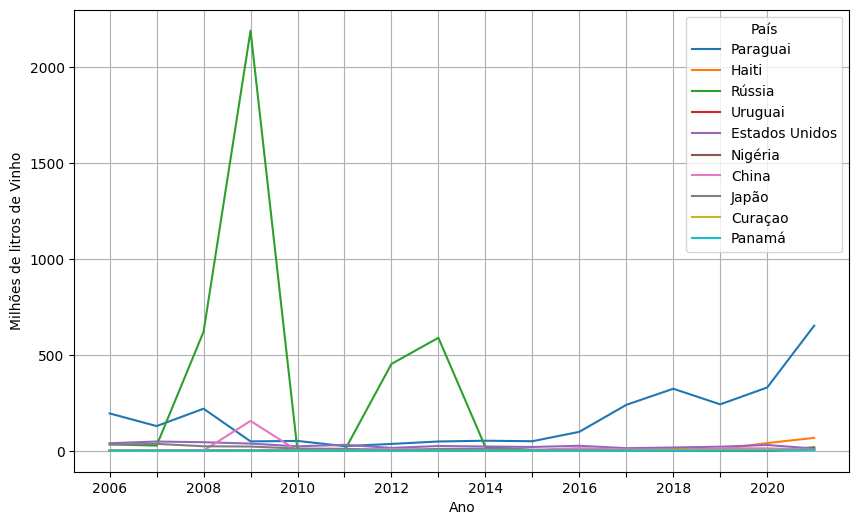

In [142]:
plota_kg(df_vinho_kg_ordenado_drop.head(10))

In [143]:
df_vinho_kg_ordenado_drop_russia = df_vinho_kg_ordenado_drop.drop('Rússia', axis=0)

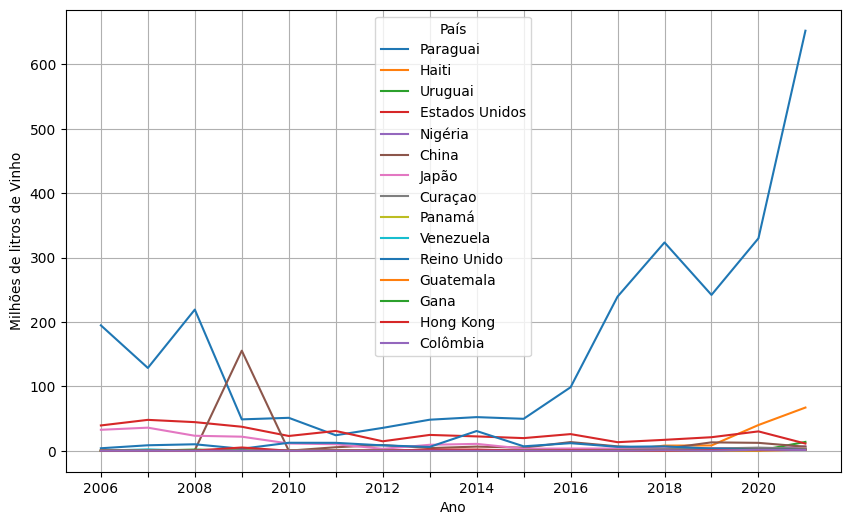

In [144]:
plota_kg(df_vinho_kg_ordenado_drop_russia.head(15))

In [145]:
def plota_div(dados, figsize=(10,6)): # uma função em python
  axis = dados.T.plot(kind='line',figsize=figsize)
  axis.set_ylabel("USD FOB/Litro")
  axis.set_xlabel("Ano")
  plt.grid()
  axis.set_xticks(range(15))

In [146]:
df_usd_div_kg.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Id,ISO
País,,,,,,,,,,,,,,,,,,
Afeganistão,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.181818,1,AFG
África do Sul,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.653846,5.250000,0.000000,2,ZAF
"Alemanha, República Democrática",2.329669,1.991867,1.617998,1.748141,5.003283,3.996396,6.880205,4.310896,3.570003,4.192884,4.860762,5.670266,4.204373,6.958197,5.207635,2.498517,3,DDR
Angola,4.857408,1.918669,2.763617,1.537528,5.658760,4.968032,3.127780,5.912270,1.898210,8.956499,4.809077,6.064897,1.486373,3.086957,0.000000,0.000000,4,AGO
Anguilla,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,AIA


In [147]:
df_usd_div_kg_drop = df_usd_div_kg.drop(['Id', 'ISO'], axis=1)

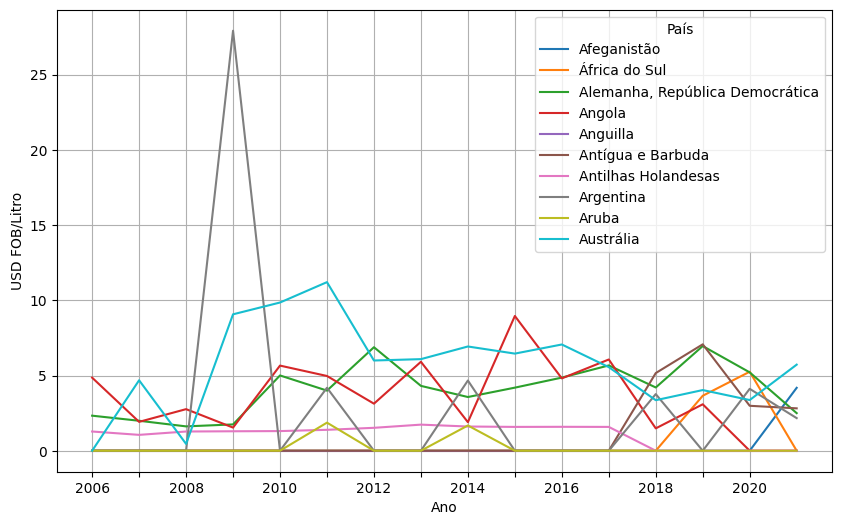

In [148]:
plota_div(df_usd_div_kg_drop.head(10))

In [149]:
lista_maiores_exportadores_ordenados = df_vinho_kg_ordenado_drop_russia.index

In [150]:
# lista_maiores_exportadores_ordenados = pd.Series(['Paraguai','Haiti','Uruguai','Estados Unidos','Nigéria','China','Japão','Curaçao', 'Panamá', 'Venezuela'])

In [151]:
df_usd_div_kg_ordenados = df_usd_div_kg_drop.loc[df_vinho_kg_ordenado_drop_russia.index]

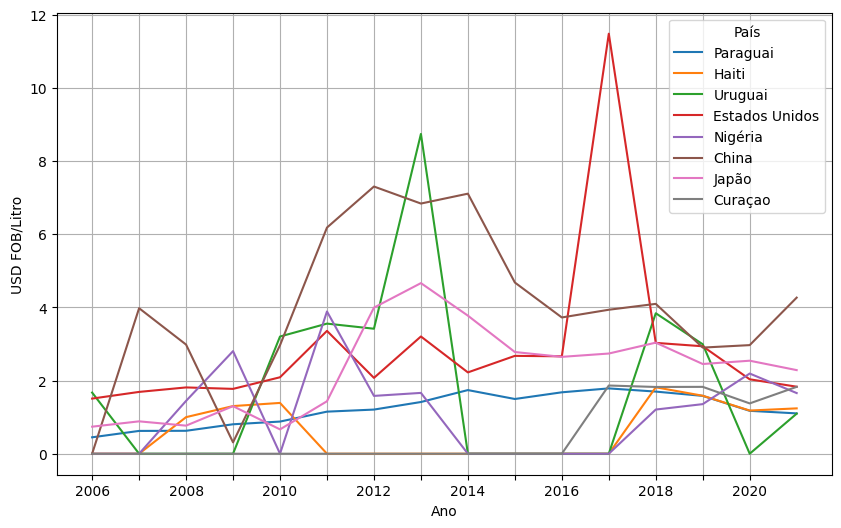

In [152]:
plota_div(df_usd_div_kg_ordenados.head(8))

In [185]:
df_usd_div_kg_ordenados_2021 = df_usd_div_kg_ordenados['2021']

In [187]:
df_usd_div_kg_ordenados_2021 = pd.DataFrame(df_usd_div_kg_ordenados_2021)

In [192]:
df_usd_div_kg_ordenados_2021.head(15)

,2021
País,
Paraguai,1.102696
Haiti,1.239867
Uruguai,1.095544
Estados Unidos,1.832417
Nigéria,1.658271
China,4.267921
Japão,2.285964
Curaçao,1.828503
Panamá,1.641057


<Axes: ylabel='País'>

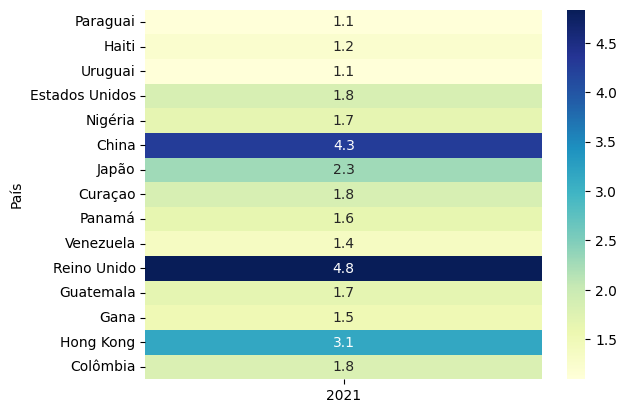

In [197]:
sns.heatmap(df_usd_div_kg_ordenados_2021.head(15), cmap='YlGnBu', annot=True)